In [69]:
from datetime import date, datetime, timedelta
from sympy import symbols, Eq, solve
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data cleaning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, normalize, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

# modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score, precision_recall_curve

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score, precision_recall_curve
from sklearn.linear_model import LinearRegression, Ridge
import operator
from functools import reduce

import random
from pingouin import partial_corr
import shap

In [17]:
X_train = pd.read_csv("C:/Users/vandemey/OneDrive - TomTom/Documents/pythonProject/X_train.csv")
y_train = pd.read_csv("C:/Users/vandemey/OneDrive - TomTom/Documents/pythonProject/y_train.csv")
X_test = pd.read_csv("C:/Users/vandemey/OneDrive - TomTom/Documents/pythonProject/X_test.csv")
y_test = pd.read_csv("C:/Users/vandemey/OneDrive - TomTom/Documents/pythonProject/y_test.csv")

In [18]:
del X_train['Unnamed: 0']
X_train.head()

,fifa_rank_delta,home_team_offense/away_team_defense,away_team_offense/home_team_defense,matches_won_delta,win/loose_ratio_delta,perc_matches_won_delta,perc_matches_lost_delta,total_goals_scored_delta,scored/counter_ratio_delta,goal_saldo_delta,...,matches_played_delta,matches_lost_delta,matches_drawn_delta,average_goals_scored_delta,total_counter_goals_delta,average_counter_goals_delta,lead_tournament,qualification_match,home_team_fifa_rank,away_team_fifa_rank
0,0.409877,0.241240,0.433129,0.522727,0.4125,0.409,0.581,0.540373,0.5000,0.427928,...,0.593220,0.68,0.583333,0.459459,0.500000,0.559524,0.555556,1.0,0.276190,0.100962
1,0.516049,0.410472,0.192912,0.340909,0.4950,0.448,0.459,0.254658,0.4600,0.297297,...,0.271186,0.32,0.500000,0.445946,0.380282,0.559524,0.666667,0.0,0.033333,0.062500
2,0.646914,0.443101,0.325157,0.681818,0.6875,0.750,0.375,0.552795,0.7200,0.554054,...,0.542373,0.44,0.416667,0.479730,0.316901,0.472222,0.555556,1.0,0.161905,0.447115
3,0.553086,0.327826,0.270710,0.522727,0.3500,0.400,0.700,0.527950,0.3200,0.396396,...,0.542373,0.68,0.458333,0.469595,0.535211,0.599206,0.666667,0.0,0.304762,0.408654
4,0.348148,0.223090,0.385445,0.454545,0.3025,0.380,0.778,0.416149,0.2725,0.333333,...,0.440678,0.72,0.291667,0.432432,0.507042,0.599206,0.555556,1.0,0.314286,0.019231


In [19]:
X_train.columns

Index(['fifa_rank_delta', 'home_team_offense/away_team_defense',
       'away_team_offense/home_team_defense', 'matches_won_delta',
       'win/loose_ratio_delta', 'perc_matches_won_delta',
       'perc_matches_lost_delta', 'total_goals_scored_delta',
       'scored/counter_ratio_delta', 'goal_saldo_delta',
       'player_strength_delta', 'offense/defense_ratio_delta',
       'EMA_40_away_scores_TS', 'EMA_40_scores_TS_diff', 'EMA_40_diff',
       'total_players_score_diff', 'EMA_40_tps_diff', 'EMA_40_away_results_TS',
       'EMA_40_results_TS_diff', 'moving_off_score_TS_delta',
       'moving_def_score_TS_delta', 'fifa_normalized_delta',
       'total_subscores_TS_delta', 'difference_subscores_fifa_rank_away',
       'difference_subscores_fifa_delta', 'hist_ratio_delta',
       'goalkeeper_score_delta', 'defense_score_delta', 'midfield_score_delta',
       'offense_score_delta', 'home_team', 'away_team', 'neutral_location',
       'unbeaten_matches_delta', 'matches_played_delta', 'mat

In [20]:
del y_train['Unnamed: 0']
y_train.head()

,home_team_result
0,2.0
1,1.0
2,2.0
3,2.0
4,0.0


In [21]:
del X_test['Unnamed: 0']
X_test.head()

,fifa_rank_delta,home_team_offense/away_team_defense,away_team_offense/home_team_defense,matches_won_delta,win/loose_ratio_delta,perc_matches_won_delta,perc_matches_lost_delta,total_goals_scored_delta,scored/counter_ratio_delta,goal_saldo_delta,...,matches_played_delta,matches_lost_delta,matches_drawn_delta,average_goals_scored_delta,total_counter_goals_delta,average_counter_goals_delta,lead_tournament,qualification_match,home_team_fifa_rank,away_team_fifa_rank
0,0.493827,0.335082,0.245601,0.454545,0.4650,0.4245,0.4945,0.453416,0.5100,0.445946,...,0.389831,0.36,0.541667,0.462838,0.373239,0.551587,0.555556,0.0,0.328571,0.317308
1,0.424691,0.243770,0.399086,0.477273,0.3225,0.3130,0.6720,0.465839,0.3225,0.360360,...,0.542373,0.68,0.541667,0.435811,0.521127,0.583333,0.555556,0.0,0.209524,0.062500
2,0.491358,0.345085,0.285927,0.704545,0.5900,0.5975,0.4165,0.658385,0.5825,0.540541,...,0.610169,0.44,0.541667,0.493243,0.457746,0.543651,0.555556,0.0,0.190476,0.173077
3,0.516049,0.285627,0.313610,0.613636,0.4650,0.4625,0.5310,0.484472,0.4450,0.391892,...,0.610169,0.56,0.583333,0.415541,0.492958,0.559524,0.555556,0.0,0.014286,0.043269
4,0.572840,0.399857,0.226796,0.590909,0.6000,0.6255,0.4300,0.515528,0.5825,0.468468,...,0.474576,0.44,0.416667,0.476351,0.408451,0.539683,0.555556,0.0,0.028571,0.168269


In [22]:
del y_test['Unnamed: 0']
y_test.head()

,home_team_result
0,2.0
1,0.0
2,0.0
3,1.0
4,2.0


In [23]:
forest = RandomForestClassifier(n_estimators = 500, max_depth=8, random_state=4)
forest.fit(X_train, y_train)

C:\Users\vandemey\AppData\Local\Temp\ipykernel_49900\2477159823.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=500, random_state=4)

In [24]:
forest.score(X_train, y_train)

0.6130488103998037

In [34]:
pred = forest.predict(X_test)
pred_proba = forest.predict_proba(X_test)

In [36]:
# Classification Report
target_names = ["win","draw", "loss"]
print(classification_report(y_test, pred, target_names=target_names, zero_division=0))

              precision    recall  f1-score   support

         win       0.66      0.68      0.67        28
        draw       0.00      0.00      0.00         9
        loss       0.60      0.78      0.68        27

    accuracy                           0.62        64
   macro avg       0.42      0.49      0.45        64
weighted avg       0.54      0.62      0.58        64



In [48]:
# Function for creating roc & prec recall curves
def curves(y_test, pred_proba):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

    precision = dict()
    recall = dict()
    FalsePosRate = dict()
    TruePosRate = dict()

    n_classes = 3
    y_test_b = label_binarize(y_test.tolist(), classes=[2,1,0])

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_b[:, i],
                                                                pred_proba[:, i])
        ax1.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

    labels = [2,1,0]
    ax1.set(xlabel="recall")
    ax1.set(ylabel="precision")
    ax1.legend(loc="best", labels=labels)
    ax1.set_title("precision vs. recall curve")

    for i in range(n_classes):
        FalsePosRate[i], TruePosRate[i], _ = roc_curve(y_test_b[:, i],
                                          pred_proba[:, i])
        ax2.plot(FalsePosRate[i], TruePosRate[i], lw=2, label='class {}'.format(i))

    ax2.set(xlabel="false positive rate")
    ax2.set(ylabel="true positive rate")
    ax2.legend(loc="best", labels=labels)
    ax2.set_title("ROC curve")
    plt.show()

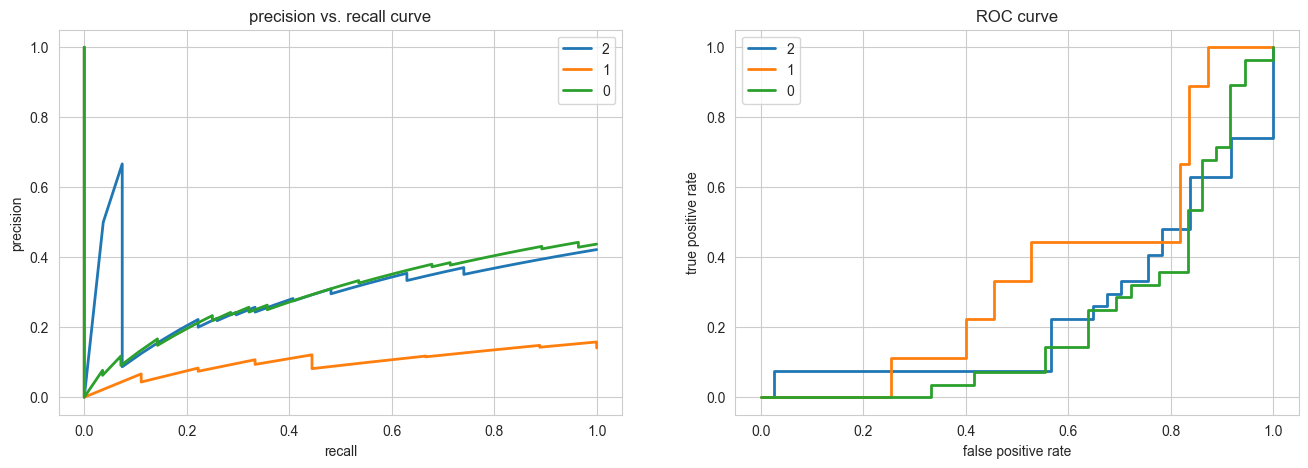

In [49]:
curves(y_test['home_team_result'], pred_proba)

In [51]:
# Function for creating two confusion matrices
def matrices(y_test, pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)

    labels = [2,1,0]

    dataN = confusion_matrix(y_test, pred, normalize = 'true')
    data = confusion_matrix(y_test, pred)
    df_cmN = pd.DataFrame(dataN, columns=[2,1,0], index = [2,1,0])
    df_cm = pd.DataFrame(data, columns=[2,1,0], index = [2,1,0])

    g1 = sns.heatmap(df_cmN, cmap='Blues', fmt='g' ,annot=True, cbar=False, ax=ax1)
    g1.set_xlabel('Predicted label')
    g1.set_ylabel('True label')
    g1.set_xticklabels(labels, rotation=45)
    g1.set_yticklabels(labels, rotation=0)

    g2 = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True, cbar=False, ax=ax2)
    g2.set_xlabel('Predicted label')
    #g2.set_ylabel('True label')
    g2.set_xticklabels(labels, rotation=45)
    g2.set_yticklabels(labels, rotation=0)

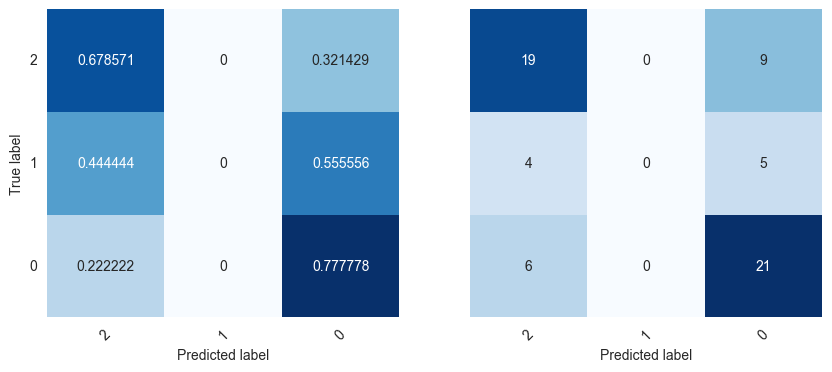

In [52]:
matrices(y_test, pred)

# SHAP

In [53]:
Nfimpo  = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(Nfimpo)

EMA_40_diff                            0.117052
difference_subscores_fifa_delta        0.087991
EMA_40_scores_TS_diff                  0.071656
EMA_40_results_TS_diff                 0.066154
EMA_40_tps_diff                        0.065804
fifa_rank_delta                        0.065372
fifa_normalized_delta                  0.062616
total_players_score_diff               0.042852
offense/defense_ratio_delta            0.036827
player_strength_delta                  0.032033
offense_score_delta                    0.026740
midfield_score_delta                   0.024468
home_team_offense/away_team_defense    0.024407
total_subscores_TS_delta               0.021818
away_team_offense/home_team_defense    0.021745
defense_score_delta                    0.015388
EMA_40_away_scores_TS                  0.014767
difference_subscores_fifa_rank_away    0.012859
EMA_40_away_results_TS                 0.012771
moving_def_score_TS_delta              0.012569
moving_off_score_TS_delta              0

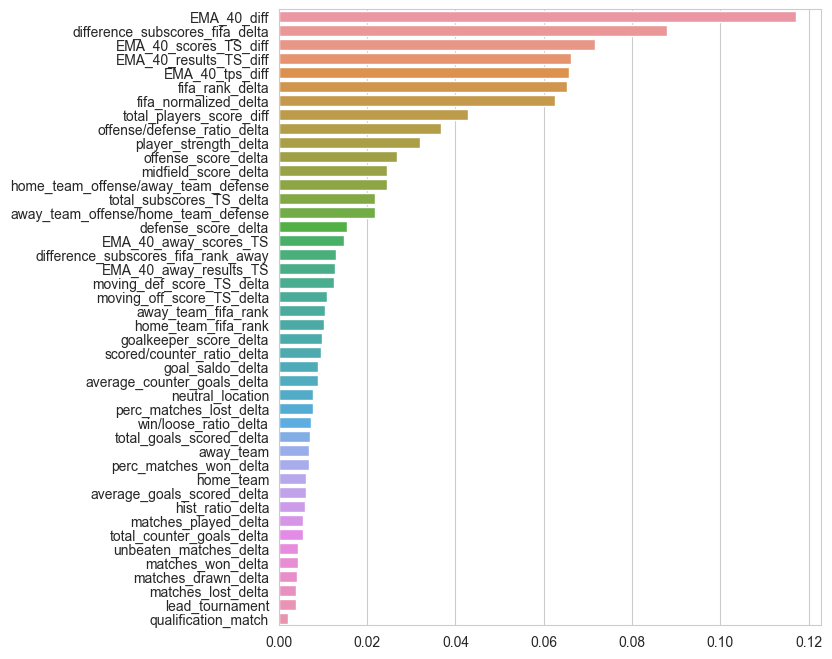

In [54]:
plt.figure(figsize=(7,8))
sns.barplot(x=Nfimpo.sort_values(ascending=False).values, y=Nfimpo.sort_values(ascending=False).index);

In [55]:
shap_values = shap.TreeExplainer(forest).shap_values(X_train)

In [56]:
shap_values_test = shap.TreeExplainer(forest).shap_values(X_test)

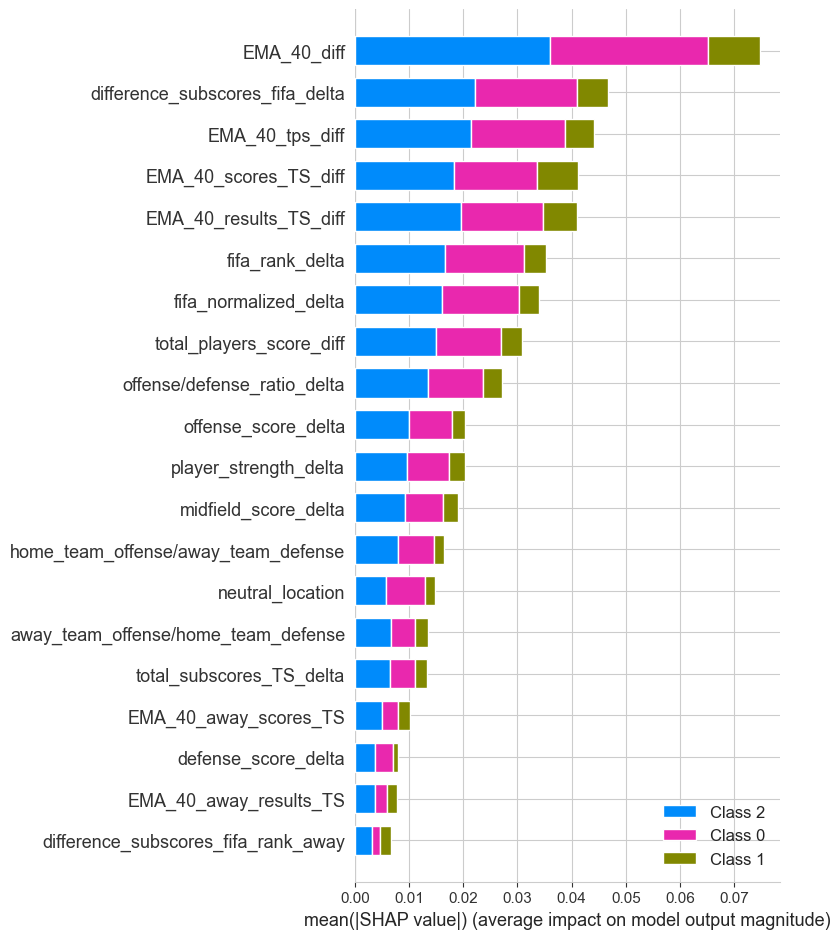

In [57]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

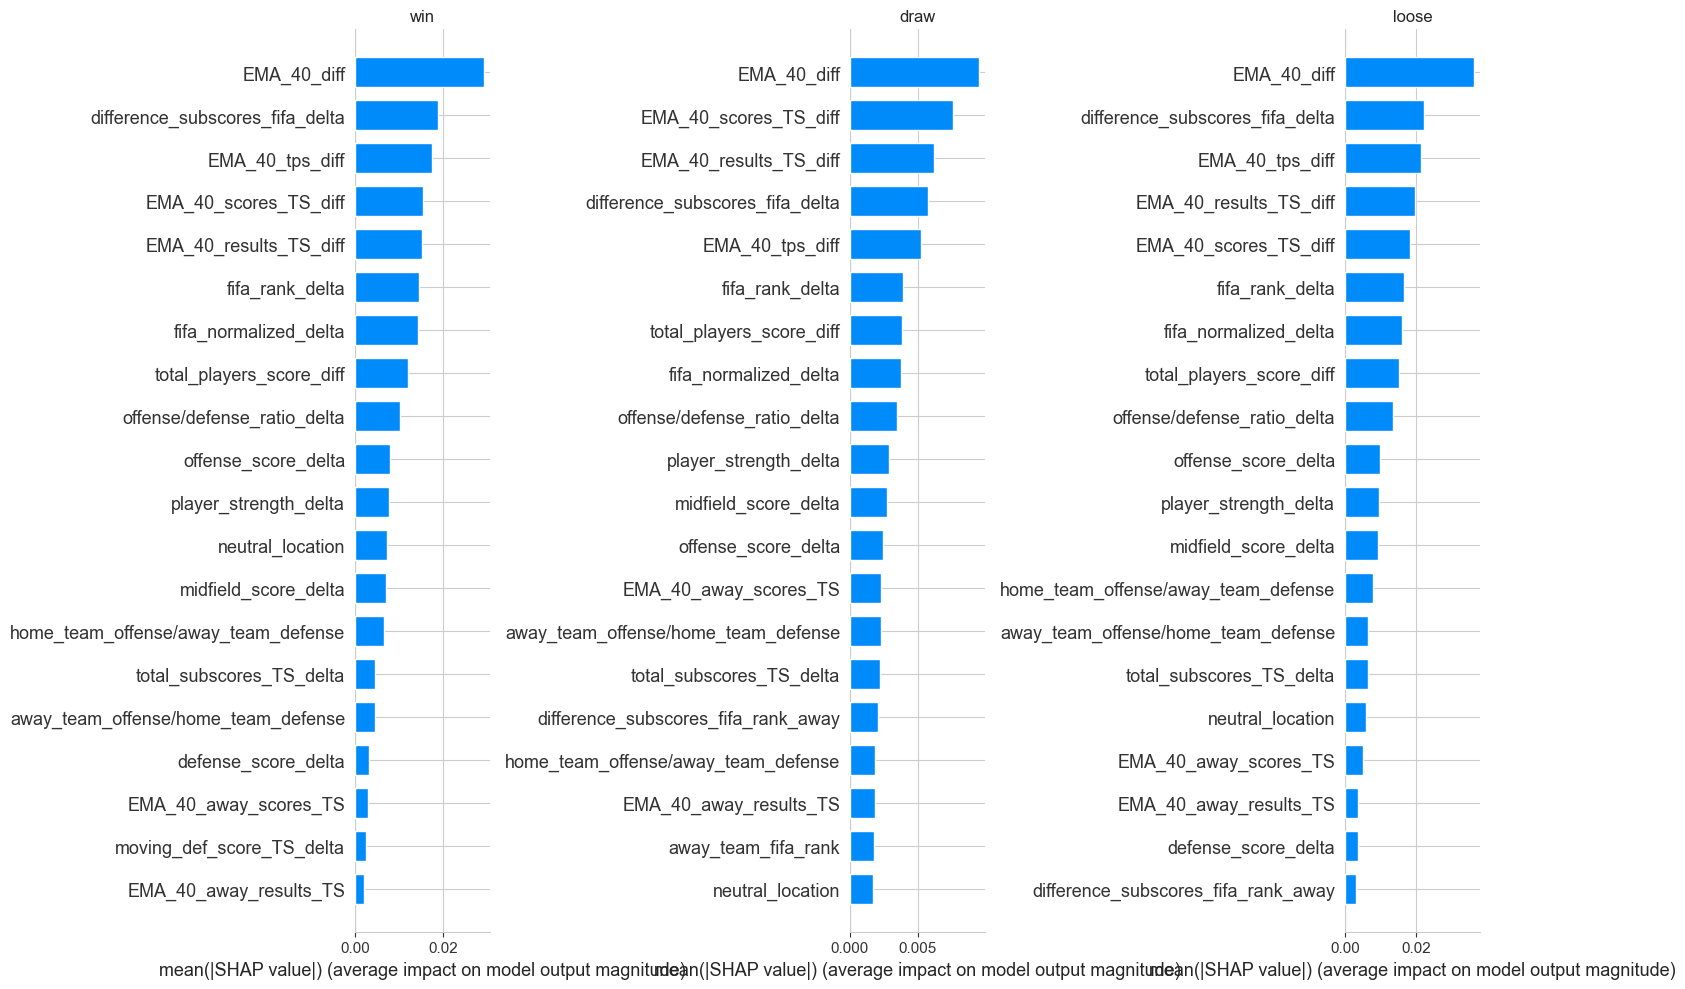

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1).set_title("win")
shap.summary_plot(shap_values[0], X_train, plot_type="bar", plot_size=None, show=False)
plt.subplot(1,3,2).set_title("draw")
shap.summary_plot(shap_values[1], X_train, plot_type="bar", plot_size=None, show=False)
plt.subplot(1,3,3).set_title("loose")
shap.summary_plot(shap_values[2], X_train, plot_type="bar", plot_size=None, show=False)
plt.tight_layout()
plt.show()

In [62]:
def ABS_SHAP(df_shap,df,ax):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy() # OLD: .reset_index().drop('id',axis=1)

    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')

    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, legend=False, ax=ax)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

In [63]:
shap_values[0]

array([[ 1.22856972e-02,  9.47743959e-03,  4.37043995e-03, ...,
        -9.15662312e-04, -9.71694895e-04,  2.14451280e-03],
       [-6.71836351e-03, -8.39124637e-03, -5.96142674e-03, ...,
         6.82014401e-04, -1.25073315e-03,  5.24179776e-04],
       [-1.64960109e-02, -6.61063135e-03,  4.55913719e-03, ...,
        -2.06190898e-03, -6.46340981e-04,  8.88804482e-05],
       ...,
       [-7.53090632e-03, -6.68479680e-03, -5.85473362e-03, ...,
         1.20276734e-03, -1.42191602e-04,  5.45410383e-04],
       [ 1.22419664e-02, -1.19641168e-03,  2.77656352e-03, ...,
         8.35315458e-04, -1.14296939e-03,  3.01145941e-04],
       [-1.89895405e-02, -6.65217221e-03, -5.81827850e-03, ...,
         1.02115971e-03, -4.92967176e-04, -2.13573035e-04]])

invalid value encountered in divide
invalid value encountered in divide


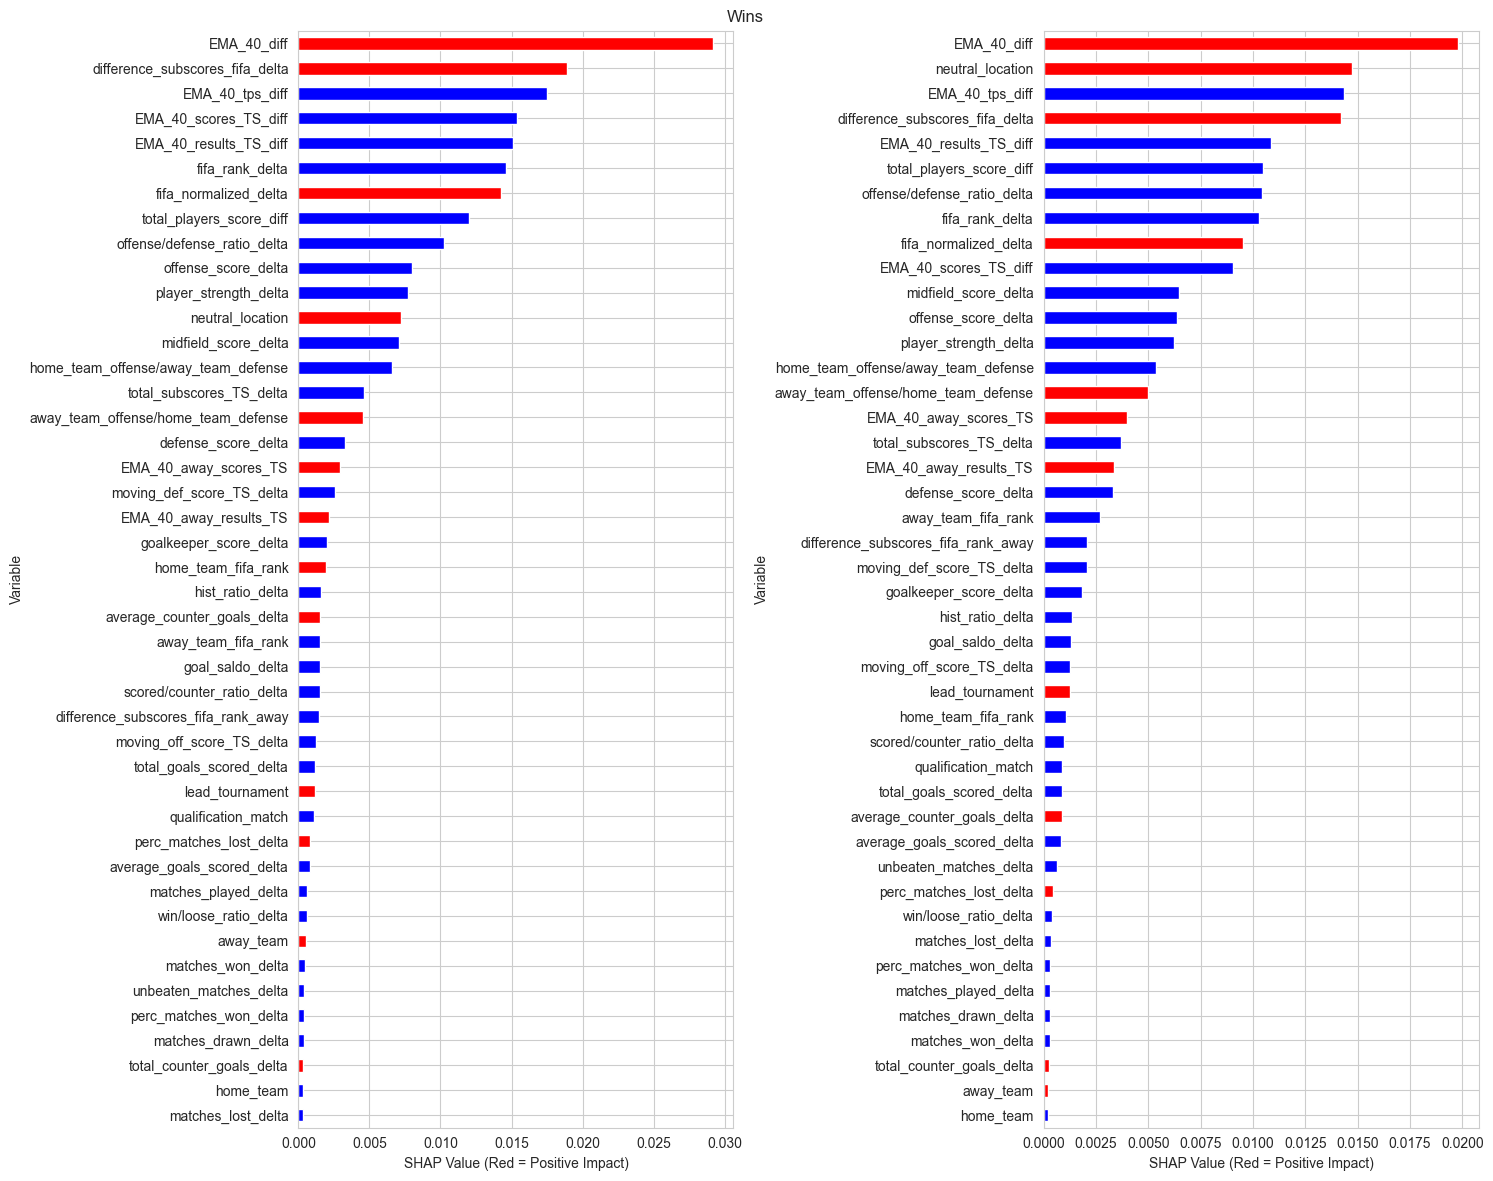

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,12))
plt.suptitle('Wins')
ABS_SHAP(shap_values[0], X_train, axes[0])
ABS_SHAP(shap_values_test[0], X_test, axes[1])
plt.tight_layout()

invalid value encountered in divide
invalid value encountered in divide


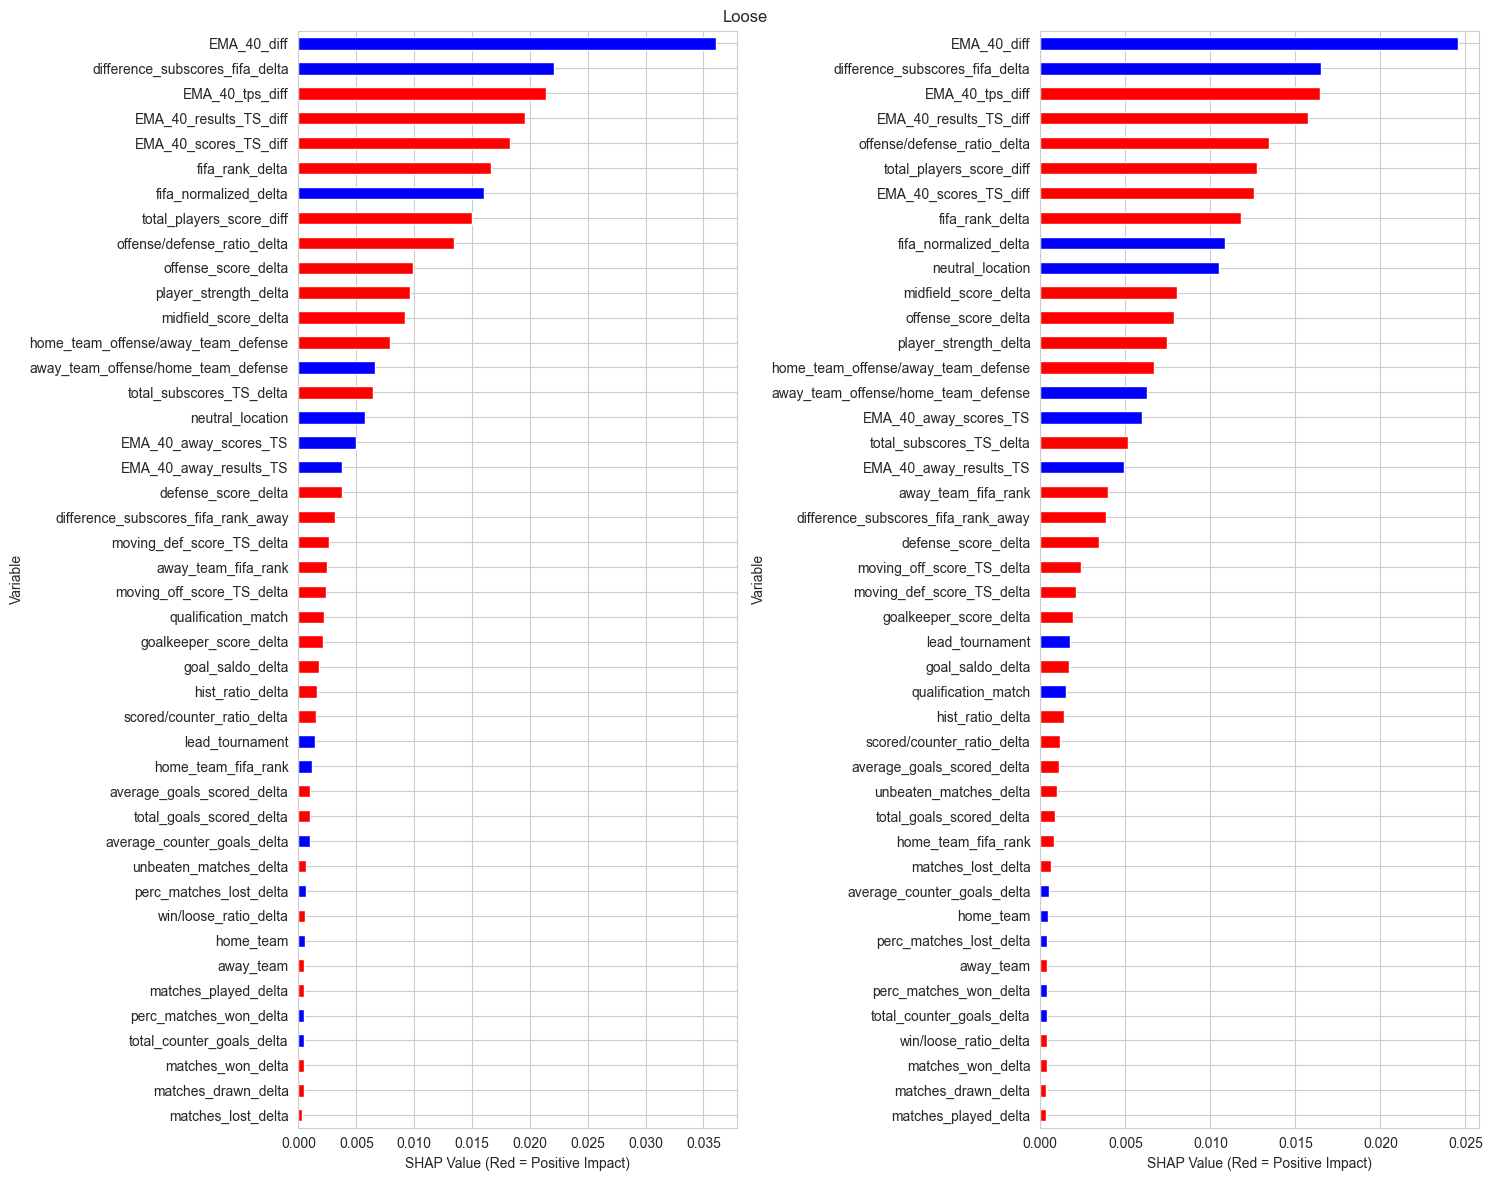

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,12))
plt.suptitle('Loose')
ABS_SHAP(shap_values[2], X_train, axes[0])
ABS_SHAP(shap_values_test[2], X_test, axes[1])
plt.tight_layout()

## Partial correlation & SHAP

In [70]:
# Define function for partial correlation
def Npartial_correlation(X, X_, y):
    X = pd.DataFrame(X, columns=X_.columns.to_list())
    #print(X)
    #print(X.shape)
    out = pd.Series(index = X.columns, dtype = float)
    for feature_name in X.columns:
        #print(feature_name)
        out[feature_name] = partial_corr(
            data = pd.concat([X, y], axis = 1),
            x = feature_name,
            y = y.name,
            x_covar = [f for f in X.columns if f != feature_name]
        ).loc['pearson', 'r']
    return out

In [71]:
y_test['win'] = y_test.apply(lambda row: 1 if row.home_team_result == 2 else 0, axis=1)
y_test['draw'] = y_test.apply(lambda row: 1 if row.home_team_result == 1 else 0, axis=1)
y_test['loose'] = y_test.apply(lambda row: 1 if row.home_team_result == 0 else 0, axis=1)

y_train['win'] = y_train.apply(lambda row: 1 if row.home_team_result == 2 else 0, axis=1)
y_train['draw'] = y_train.apply(lambda row: 1 if row.home_team_result == 1 else 0, axis=1)
y_train['loose'] = y_train.apply(lambda row: 1 if row.home_team_result == 0 else 0, axis=1)

In [74]:
# Compute ParShap
Nparshap_train = Npartial_correlation(shap_values[1], X_train, y_train['draw'])
Nparshap_test = Npartial_correlation(shap_values_test[1], X_test, y_test['draw'])
Nparshap_diff_1 = pd.Series(Nparshap_test - Nparshap_train, name = 'parshap_diff')
print('\n################# Print parshap_diff for Functional Needs Repair')
print(Nparshap_diff_1.sort_values())


################# Print parshap_diff for Functional Needs Repair
EMA_40_away_results_TS                -0.483045
total_counter_goals_delta             -0.317813
goalkeeper_score_delta                -0.282237
hist_ratio_delta                      -0.255210
moving_def_score_TS_delta             -0.216592
home_team                             -0.204899
total_players_score_diff              -0.187665
lead_tournament                       -0.185858
moving_off_score_TS_delta             -0.181602
average_goals_scored_delta            -0.170132
away_team_fifa_rank                   -0.159499
defense_score_delta                   -0.153254
away_team                             -0.127134
neutral_location                      -0.124919
EMA_40_tps_diff                       -0.123809
matches_played_delta                  -0.123348
unbeaten_matches_delta                -0.107145
goal_saldo_delta                      -0.104937
offense_score_delta                   -0.093445
fifa_rank_delta       

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


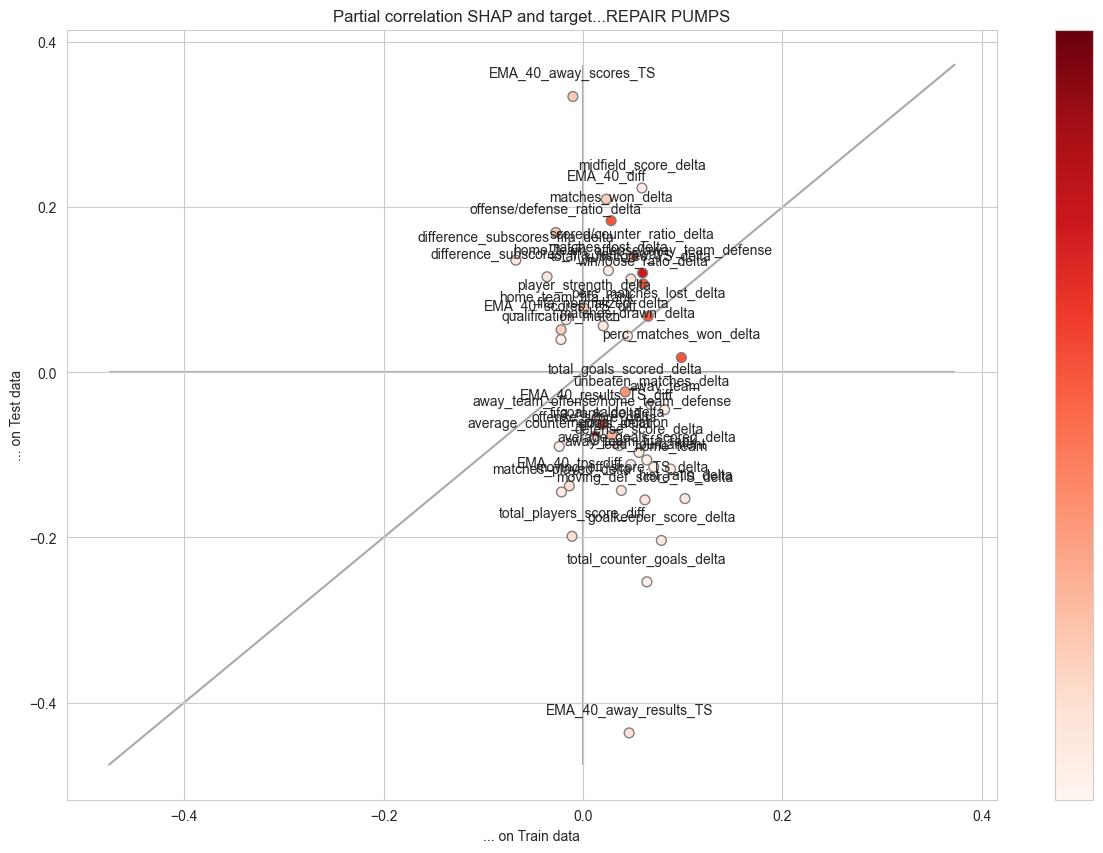

In [75]:
# Plot parshap

Nplotmin, Nplotmax = min(Nparshap_train.min(), Nparshap_test.min()), max(Nparshap_train.max(), Nparshap_test.max())
Nplotbuffer = .05 * (Nplotmax - Nplotmin)
fig, ax = plt.subplots(figsize = (15, 10))
if Nplotmin < 0:
    ax.vlines(0, Nplotmin - Nplotbuffer, Nplotmax + Nplotbuffer, color = 'darkgrey', zorder = 0)
    ax.hlines(0, Nplotmin - Nplotbuffer, Nplotmax + Nplotbuffer, color = 'darkgrey', zorder = 0)
ax.plot(
    [Nplotmin - Nplotbuffer, Nplotmax + Nplotbuffer], [Nplotmin - Nplotbuffer, Nplotmax + Nplotbuffer],
    color = 'darkgrey', zorder = 0
)
sc = ax.scatter(
    Nparshap_train, Nparshap_test,
    edgecolor = 'grey', c = Nfimpo, s = 50, cmap = plt.cm.get_cmap('Reds'), vmin = 0, vmax = Nfimpo.max())
ax.set(title = 'Partial correlation SHAP and target...REPAIR PUMPS', xlabel = '... on Train data', ylabel = '... on Test data')
cbar = fig.colorbar(sc)
cbar.set_ticks([])
for txt in Nparshap_train.index:
    ax.annotate(txt, (Nparshap_train[txt], Nparshap_test[txt] + Nplotbuffer / 2), ha = 'center', va = 'bottom')
fig.savefig('parshap.png', dpi = 300, bbox_inches="tight")
fig.show()